### exercise 1 linear regression 
### hypothesis testing, outliers, high-leverage points 

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix 
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

In [2]:
np.random.seed(0)

x1 = np.random.random(100) 
# Uniform Distribution 
# random.random() [0,1)
# random.uniform(a,b) [a,b]

epsilon1 = np.random.randn(100) # standard normal distribution.
epsilon2 = np.random.randn(100)

x2 = 0.5 * x1 + epsilon1/10
y = (2 + 2*x1 + 0.3*x2 + epsilon2)

In [3]:
correlation = np.corrcoef(x1,x2) # pearson 
print(correlation)
print('The correlation between x1 and x2 is', correlation[0,1])

[[1.         0.81926336]
 [0.81926336 1.        ]]
The correlation between x1 and x2 is 0.8192633558220391


In [4]:
df = pd.DataFrame(np.column_stack((y,x1,x2)), columns=['y','x1','x2'] )
df.head()

,y,x1,x2
0,2.791001,0.548814,0.157892
1,2.189731,0.715189,0.447677
2,2.666293,0.602763,0.347948
3,0.902008,0.544883,0.118817
4,3.580737,0.423655,0.360653


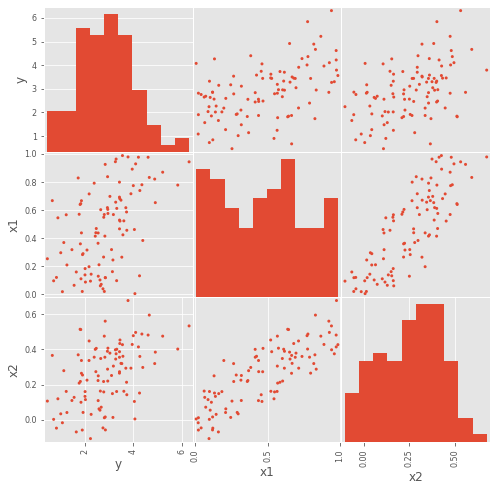

In [5]:
scatter_matrix(df, alpha=1, figsize = (8,8), diagonal='hist');

In [6]:
X = sm.add_constant(df[['x1','x2']])
y = df.y
model = sm.OLS(y,X)
estimate = model.fit()

print(estimate.summary())
print('\n')
print('[beta_0, beta_1, beta_2] are:\n',estimate.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           4.16e-07
Time:                        14:08:54   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.0

In [7]:
X = sm.add_constant(df.x1)
model_x1 = sm.OLS(df.y,X)
estimate_x1 = model_x1.fit()

print('Model using x_1 as predictor')
print(estimate_x1.summary())

Model using x_1 as predictor
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.76e-07
Time:                        14:08:54   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548  

In [8]:
X2 = sm.add_constant(df.x2)
model_x2 = sm.OLS(df.y,X2)
estimate_x2 = model_x2.fit()

print('Model using x_2 as predictor')
print(estimate_x2.summary())

Model using x_2 as predictor
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           4.29e-07
Time:                        14:08:54   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721  

In [9]:
df.loc[len(df)] = [6, 0.1, 0.8]
df.tail()

,y,x1,x2
96,3.730642,0.586513,0.212916
97,1.906441,0.020108,-0.058901
98,1.737871,0.828940,0.368917
99,4.075113,0.004695,0.004096
100,6.000000,0.100000,0.800000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.18e-07
Time:                        14:08:54   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9480      0.194     10.025      0.0

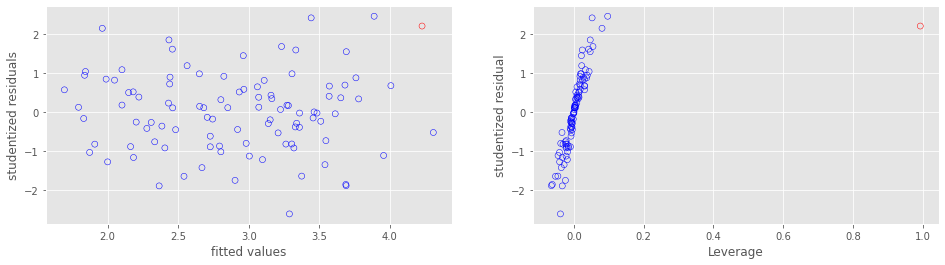

In [10]:
X = sm.add_constant(df[['x1','x2']])
#X = sm.add_constant(df[['x1']])
#X = sm.add_constant(df[['x2']])

model = sm.OLS(df.y, X)
estimate = model.fit()

print(estimate.summary())

# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues.values
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# Studentized Residuals
ax1.scatter(fitted_values[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');
# Plot the possible Outlier in red
ax1.scatter(fitted_values[len(fitted_values)-1], studentized_residuals[len(fitted_values)-1], facecolors='none', edgecolors='r');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('studentized residuals');

# Leverages
ax2.scatter(leverages[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');
# plot the possible high leverager in red
ax2.scatter(leverages[len(leverages)-1], studentized_residuals[len(leverages)-1], facecolors='none', edgecolors='r');
ax2.set_xlabel('Leverage');
ax2.set_ylabel('studentized residual');